Методы решения нелинейных систем

\subsection{Задача 1}

На примере уравнения 

$${\sqrt[3]{x}*\tan{x}=x^2+1}$$

провести сравнительный анализ следующих методов решения нелинейных уравнений: 1) Метод простой итерации; 2) Метод Ньютона; 3) Метод Стеффенсена; 4) Метод Чебышева третьего порядка

\subsubsection{Постановка задачи}
Пусть задана функция $f(x)$ действительного переменного $x ∈ R$. Требуется найти
корни уравнения

$$f(x) = 0,$$

или, что то же самое, нули функции $f(x)$.
Выясним, является ли задача корректно поставленной. Для ответа на вопрос существования и единственности решения введем теорему из математического анализа.

\begin{theorem}
    Если функция $f(x)$ непрерывна на отрезке $[a, b]$ и принимает на его концах значения разных знаков, то на этом отрезке существует по крайней мере
    один корень уравнения $f(x) = 0$. Если при этом функция $f(x)$ будет монотонной
    на отрезке $[a, b]$, то она может иметь только один корень.
\end{theorem}

В данном случае вопрос непрерывной зависимости от входных данных отпадает.

\subsubsection{Отделение корней}
Данный этап будет общим для всех рассматриваемых методов, так как в независимости от используемого метода сами корни уравнения не меняют своего расположения
на числовой прямой. Этот этап необходим для того, чтобы в процессе приближения
корня мы случайным образом не пришли к другому корню, не тому, для которого
мы считали приближение.

Суть этого этапа заключается в том, что мы выбираем для каждого корня отрезок, в
котором он находится, при этом мы гарантируем, что других корней в этом отрезке
нет.

Отделять корни будем, используя графический метод.
Для начала определим исследуемую функцию. Пусть

$${f(x) = \sqrt[3]{x}*\tan{x}-x^2-1 = 0},$$

то есть корни этого уравнения мы и будем искать. Сразу заметим, что эта функция
непрерывная, так как является результатом сложения непрерывных функций.

In [75]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.options.display.float_format ='{:,.8f}'.format

In [76]:
def f(x):
    return x**(1/3) * math.tan(x) - x**2 - 1

Сперва изобразим графически две следующие функции:
    
$${y_1(x) = \sqrt[3]{x}\tan{x}}, {y_2(x) = x^2+1},$$


Причем предположим, что отрезка $[−10; 10]$ для начала нам будет достаточно (выбор
этого отрезка основан на интуитивных предположениях).

C:\Users\Morzhig\AppData\Local\Temp\ipykernel_20272\2706638447.py:2: RuntimeWarning: invalid value encountered in power
  return x**(1/3) * np.tan(x)


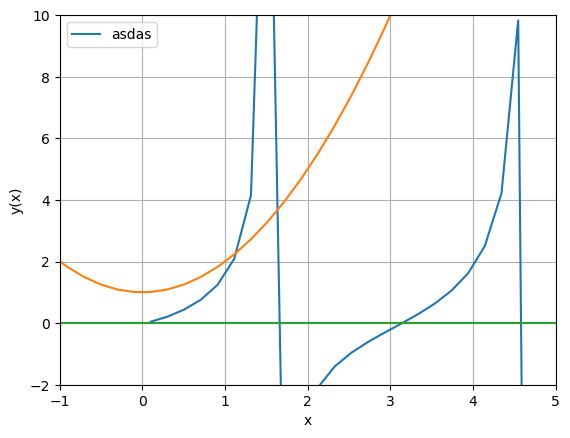

In [125]:
def y_1(x):
    return x**(1/3) * np.tan(x)

def y_2(x):
    return x**2 + 1

x = np.linspace(-10, 10, 100)
y = np.linspace(-2, 10, 100)

fig, ax = plt.subplots()

ax.plot(x, y_1(x), label='asdas')
ax.plot(x, y_2(x))
ax.plot(y, 0*x)

ax.set_xlim(-1, 5)
ax.set_ylim(-2, 10)

ax.set_xlabel('x')
ax.set_ylabel('y(x)')

plt.legend()
plt.grid()
plt.show()

C:\Users\Morzhig\AppData\Local\Temp\ipykernel_20272\2406094422.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(x) / np.log(1/16)
C:\Users\Morzhig\AppData\Local\Temp\ipykernel_20272\2406094422.py:8: RuntimeWarning: overflow encountered in power
  return (1/16)**x
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


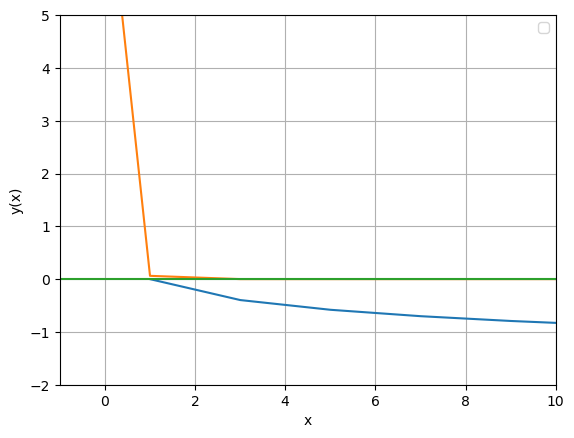

In [138]:
import math
import numpy as np

def y_1(x):
    return np.log(x) / np.log(1/16)

def y_2(x):
    return (1/16)**x

x = np.linspace(-1000, 1000, 1000)
y = np.linspace(-2, 10, 1000)

fig, ax = plt.subplots()

ax.plot(x, y_1(x))
ax.plot(x, y_2(x))
ax.plot(y, 0*x)

ax.set_xlim(-1, 10)
ax.set_ylim(-2, 5)

ax.set_xlabel('x')
ax.set_ylabel('y(x)')

plt.legend()
plt.grid()
plt.show()

Зная свойства параболы и тангенсоиды точно можно скзаать, что в данной плоскости два этих графика больше не пересекутся нигде, кроме двух точек, показанных на графике выше.

Выясним, на каких отрезках находятся данные точки. Для этого найдем производную от нашей функции $f(x)$:

$${f'(x) = \frac{\sin{x}}{3\sqrt[3]{x^2}\cos{x}}+\frac{\sqrt[3]{x}}{\cos^2{x}}-2x}$$

In [78]:
def f_derivative(x):
    return (np.sin(x) / (3 * np.cbrt(x**2) * np.cos(x))) + (np.cbrt(x) / np.cos(x)**2) - 2*x

\subsubsection{Рассмотрим отрезок $[1, 1.5]$}:

In [79]:
f(1)

-0.4425922753450977

In [80]:
f(1.5)

12.89209625375312

Рассмотрим поведение производной на этом отрезке

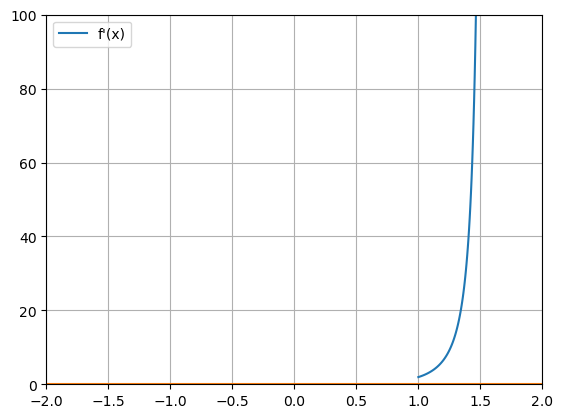

In [81]:
x = np.linspace(1, 1.5, 100)
y = np.linspace(-2, 2, 100)

fig, ax = plt.subplots()

ax.plot(x, f_derivative(x), label="f'(x)")
ax.plot(y, 0*x)

ax.set_xlim(-2, 2)
ax.set_ylim(0, 100)

plt.legend()
plt.grid()
plt.show()

На графике видно, что первая производная не меняет знак, для закрепления этого факта, проверим значения производной на концах отрезка.

In [82]:
f_derivative(1)

1.9446547290330596

In [83]:
f_derivative(1.5)

229.35832484522751

Производная принимает одинаковые по знаку значения на концах, причем эти значения положительны. Рассмотрим максимум и минимум производной на отрезке.

In [84]:
m = np.min(np.absolute(f_derivative(x)))
M = np.max(np.absolute(f_derivative(x)))

print(f'Минимум производной на отрезке: {m}')
print(f'Максимум производной на отрезке: {M}')

Минимум производной на отрезке: 1.9446547290330596
Максимум производной на отрезке: 229.35832484522751


И минимум, и максимум первой производной имеют положительные знаки, что говорит о том, что она не меняет знак, соответственно, функция монотонно возрастает, и, из условий теоремы, на отрезке у нас только один корень.

\subsubsection{Рассмотрим следующий подозрительный отрезок $[1.5, 1.75]$.}

In [85]:
f(1.5)

12.89209625375312

In [86]:
f(1.75)

-10.71495048277206

На левом конце отрезка функция положительна, на правом - отрицательна, что говорит о том, что на отрезке есть по крайней мере один корень.

Посмотрим на поведение первой производной на отрезке.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


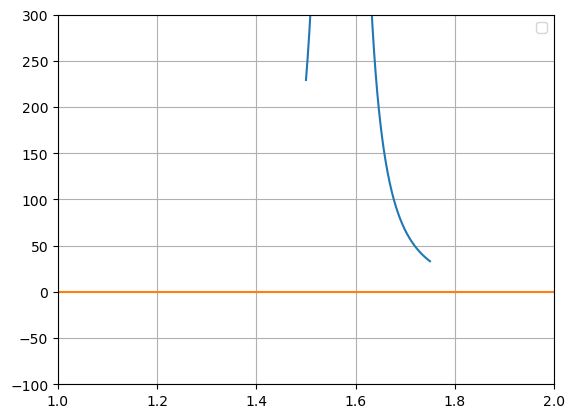

In [87]:
x = np.linspace(1.5, 1.75, 300)
y = np.linspace(1, 2, 300)

fig, ax = plt.subplots()

ax.plot(x, f_derivative(x))
ax.plot(y, 0*x)

ax.set_xlim(1, 2)
ax.set_ylim(-100, 300)

plt.legend()
plt.grid()
plt.show()

На графике видно, что первая производная не меняет знак, для закрепления этого факта, проверим значения производной на концах отрезка.

In [88]:
f_derivative(1.5)

229.35832484522751

In [89]:
f_derivative(1.75)

33.161991787380074

Производная принимает одинаковые по знаку значения на концах, причем эти значения положительны. Рассмотрим максимум и минимум производной на отрезке.

In [90]:
m = np.min(np.absolute(f_derivative(x)))
M = np.max(np.absolute(f_derivative(x)))

print(f'Минимум производной на отрезке: {m}')
print(f'Максимум производной на отрезке: {M}')

Минимум производной на отрезке: 33.161991787380074
Максимум производной на отрезке: 15494085.316958774


И минимум, и максимум первой производной имеют положительные знаки, что говорит о том, что она не меняет знак, соответственно, функция монотонно возрастает, и, из условий теоремы, на отрезке у нас только один корень.

\subsection{Метод Ньютона} 

Рассмотрим уравнение $$f(x) = 0,\eqno(1)$$ где $f(x)$ достаточно гладкая функция вещественного переменного. Предположим, что для точного решения $x^*$ каким-либо образом задано начальное приближение $x^0$. Для построения метода рассмотрим погрешность $\epsilon_0 = x^* - x^0$. В предположении, что $\epsilon_0$ достаточно малая по модулю величина, подставим в уравнение (1) $x^*$ вместо $x$, тогда $$f(x^0 + \epsilon_0)=0.$$
	Разложим это выражение в ряд Тейлора в окрестности точки $x^0$:$$f(x^0 + \epsilon_0) = f(x^0) + \epsilon_0 f'(x^0) + O(\epsilon_0^2) = 0.$$
	Теперь отбросим слагаемое $O(\epsilon_0^2)$ и получим в рамках отброшенной величины получим приближенное уравнение $$f(x^0) + \epsilon_0 f'(x^0)\approx 0.$$
	Решая это уравнение относительно $\epsilon_0$, получим $$\epsilon_0 \approx -\dfrac{f(x^0)}{f'(x_0)}.$$
	Тогда выразим из $x^* = x^0 + \epsilon_0$ и учитывая, что равенство приближенное, получим $$x^* \approx x^0 - \dfrac{f(x^0)}{f'(x_0)}.$$
	В итоге, повторяя описанную процедуру, мы можем построить итерационную формулу, которая носит название \textbf{метода Ньютона} $$x^{k+1} = x^k - \dfrac{f(x^k)}{f'(x^k)},\quad k = 0,1,\ldots;\quad x_0\eqno(2)$$
	(добавка $x_0$ означает, что начальное приближение задано).
	Иногда этот метод называют \textbf{методом касательных}. Это название следует из геометрического смысла.
	Если рассмотреть уравнение кривой $y = f(x)$, то в точке $x^k$ касательная к ней задается уравнением $$y - f(x^k) = f'(x^k) (x-x^k).$$ Находим точку пересечения касательной с осью $Ox$, полагая $y=0$, и тогда $$x= x^k - \dfrac{f(x^k)}{f'(x^k)}.$$ Таким образом строим приближение $x^{k+1}$ и так далее:
	$$
		\includegravarphics[scale=0.5]{img3}
	$$
	То есть мы приближаемся к корню по последовательности касательных прямых.\\\\
	Выясним, какова скорость сходимости этого метода. С помощью подстановки получим формулу для скорости сходимости $$\epsilon_{k+1} = \dfrac{\epsilon_k f'(x^* - \epsilon_k) + f(x^* - \epsilon_k)}{f'(x^* - \epsilon_k)}.$$ 
	Для того, чтобы получить ответ на вопрос, какова скорость сходимости, необходимо сделать несколько преобразований данного выражения. Воспользуемся тем, что мы можем разложить функции в ряд Тейлора в окрестности $x^*$: $$f(x^* - \epsilon_k) = f(x^*) - \epsilon_kf'(x^*) + \dfrac{1}{2}\epsilon_k^2 f''(x^*) + O(\epsilon_k^3),$$
	$$f'(x^* - \epsilon_k) = f'(x^*) - \epsilon_kf''(x^*) + \dfrac{1}{2}\epsilon_k^2 f'''(x^*) + O(\epsilon_k^3).$$
	В итоге после подстановки мы получим формулу $$\epsilon_{k+1} =- \dfrac{1}{2} \dfrac{f''(x^*)}{f'(x^*)}\epsilon_k^2 + O(\epsilon_k^3).$$
	Отбросив величину более высокого порядка, чем $\epsilon_k^2$, мы получим приближенное равенство $$\epsilon_{k+1} \approx - \dfrac{1}{2} \dfrac{f''(x^*)}{f'(x^*)}\epsilon_k^2=\alpha\epsilon_k^2. \eqno(3)$$
	Формула (3) доказывает, что при $|\alpha|<1$ последовательность $x^k$ построенная по формуле (2) обладает квадратичной сходимостью.
	\begin{theorem}
		[о сходимости метода Ньютона]
		Пусть выполняются следующие условия:
		\begin{enumerate}
			\item Функция $f(x)$ определена и дважды непрерывно дифференцируема на отрезке $$s_0 = [x^0; x^0 + 2h_0],\quad h_0 =- \dfrac{f(x^0)}{f'(x^0)}.$$
			При этом на концах отрезка $f(x)f'(x)\ne 0$.
			\item Для начального приближения $x^0$ выполняется неравенство $$2|h_0|M \leq |f'(x_0)|,\quad M = \underset{x\in s_0}{\max}|f''(x)|.$$
		\end{enumerate}
		Тогда справедливы следующие утверждения: \begin{enumerate}
			\item Внутри отрезка $s_0$ уравнение $f(x) = 0$ имеет корень $x^*$ и при этом этот корень единственный.
			\item Последовательность приближений $x^k$, $k=1,2,\ldots$ может быть построена по формуле $(2)$ с заданным приближением $x^0$.
			\item Последовательность $x^k$ сходится к корню $x^*$, то есть $x^k \xrightarrow[k\to\infty]{}x^*$.
			\item Скорость сходимости характеризуется неравенством $$|x^* - x^{k+1}|\leq |x^{k+1} - x^k|\leq \dfrac{M}{2|f'(x^*)|}\cdot (x^k-x^{k-1})^2,\quad k=0,1,2,\ldots\eqno(4)$$
		\end{enumerate}
	\end{theorem}
    
Рассмотрим теорему о сходимости метода Ньютона для нашего случая.

In [101]:
x0 = 1.13
print(f'Начальное приближение: {x0}')

h0 = -f(x0) / f_derivative(x0)
print(f'h_0: {h0}')

s0 = np.linspace(x0, x0 + 2 * h0, 1000)
print('s_0 = [', s0[0], ';', s0[-1], ']')

Начальное приближение: 1.13
h_0: 0.01677822950564221
s_0 = [ 1.13 ; 1.1635564590112843 ]


In [102]:
 f(x0)

-0.06900971783687493

In [103]:
f(s0[0]) * f_derivative(s0[0])

-0.28384050619426837

In [104]:
f(s0[-1]) * f_derivative(s0[-1])

0.4288433351315808

Функция на концах отрезка не обращается в ноль.

Вычислим вторую производную для функции $f(x)$:

$${f''(x) = \dfrac{3\,x\,\cos\left(x\right)\,\sin^{2}\left(x\right)+\left(18\,{x}^{2}-2\,\cos^{2}\left(x\right)\right)\,\sin\left(x\right)+3\,x\,\cos^{3}\left(x\right)+3\,x\,\cos\left(x\right)}{9\,{x}^{\frac{5}{3}}\,\cos^{3}\left(x\right)}-2}$$

In [105]:
def f_second_derivative(x):
    numerator = 3*x*np.cos(x)*np.sin(x)**2 + (18*x**2 - 2*np.cos(x)**2)*np.sin(x) + 3*x*np.cos(x)**3 + 3*x*np.cos(x)
    denominator = 9*x**(5/3) * np.cos(x)**3
    return numerator/denominator - 2

In [106]:
M = np.max(np.absolute(f_second_derivative(s0)))
print(f'M: {M}')

2 * np.absolute(h0) * M <= np.absolute(f_derivative(x0))

M: 32.52740213380584


True

Оба условия сходимости выполняются при начальном приближении 

$x_0=1.13.$

In [107]:
def newton_method(x0, epsilon, max_iterations):
    x_prev = x0
    x_next = x_prev - f(x_prev) / f_derivative(x_prev)
    iterations = 1
    
    x_k = []
    
    while abs(x_next - x_prev) > epsilon and iterations < max_iterations:
        x_k.append([x_next, abs(x_next - x_prev)])
        
        x_prev = x_next
        x_next = x_prev - f(x_prev) / f_derivative(x_prev)
        iterations += 1

    if iterations == max_iterations:
        print("Максимальное количество итераций достигнуто!")
    
    x_k.append([x_next, abs(x_next - x_prev)])
    return x_k

x0 = 1.2  # Начальное приближение
epsilon = 1e-6  # Точность
max_iterations = 100  # Максимальное количество итераций

root = newton_method(x0, epsilon, max_iterations)
print("Корень:", root[len(root) - 1][0])

df = pd.DataFrame(root, columns=[('Метод Ньютона', 'Решение'), ('Метод Ньютона', 'Погрешность')])

Корень: 1.1459643670646564


\subsection{Метод простой итерации}

Применение метода требует предварительного приведения нашего уравнения 

$$f(x) = 0,$$

к каноническому виду 

$$x = \varphi{(x)}.$$

где $\varphi(x)$ --- это заданная функция. Метод простой итерации будет иметь следующий вид: $$x^{k+1} = \varphi(x^k),\ k = 0,1,2,\ldots,\eqno(2)$$
	где $x^k$ --- последовательность, начинающаяся с $x^0$, которая должна сходится к точному решению. Область изменения аргумента $x$ на числовой оси обозначим через $X$, а через $Y$ обозначим область значений функции $y = \varphi(x)$. Тогда функцию $\varphi(x)$ можно рассматривать как оператор, преобразующий $X$ в $Y$: $$\varphi : X \to Y.$$
	Таким образом, нам нужно найти такие точки области $X$, которые при преобразовании оператором $\varphi$ переходят сами в себя, то есть точки остающиеся неподвижными при преобразовании $X$ в $Y$. Значит решения уравнения $(1)$ --- это точки, остающиеся неподвижными при преобразовании $X$ в $Y$. Геометрически это можно изобразить следующим образом: $$\includegravarphics[scale=0.4]{img1.png}$$
	Таким образом, после процедуры отделения корней мы находим начальное приближение $x^0$ в окрестности корня $x^*$. И по найденному начальному приближению по формуле (2) строится итерационная последовательность, которая и называется \textbf{методом простой итерации.}\\\\
	Мы должны обеспечить сходимость этого итерационного процесса. Сформулируем и докажем для этого теорему.
	\begin{theorem}
		[о сходимости метода простой итерации]
		Пусть выполняются следующие условия:\begin{enumerate}
			\item функция $\varphi(x)$ определена на отрезке $$|x - x^0| \leq \delta,\eqno(3)$$ непрерывна на нем и удовлетворяет условию Липшица с постоянным коэффициентом меньше единицы, то есть $\forall x, \widetilde{x}$ $$|\varphi(x) - \varphi(\widetilde{x})| \leq q |x - \widetilde{x}| ,\quad 0 \leq q < 1;\eqno(4)$$
			\item для начального приближения $x^0$ верно неравенство $$|x^0 - \varphi(x^0)| \leq m;$$
			\item числа $\delta, q, m$ удовлетворяют условию $$\dfrac{m}{1-q}\leq \delta. \eqno(5)$$
		\end{enumerate}
		Тогда \begin{enumerate}
			\item уравнение $(1)$ в области $(3)$ имеет решение;
			\item последовательность $x^k$ построенная по правилу $(2)$ принадлежит отрезку $[x^0 - \delta, x^0 + \delta]$, является сходящейся и ее предел удовлетворяет уравнению $(1)$: $$x^k \xrightarrow[k\to \infty]{} x^*;$$
			\item скорость сходимости $x^k$ к $x^*$ оценивается неравенством $$|x^* - x^k| \leq \dfrac{m}{1- q}q^k,\ k = 1,2,\ldots \eqno(6)$$
		\end{enumerate}
		Также эта теорема может называется \textbf{методом сжимающих отображений}.
	\end{theorem}

\textbf{Замечания.}\begin{enumerate}
\item Так как сходимость метода простых итераций возможна при сжимающем отображении, то условие $|\varphi'(x)|<1$ является определяющим при приведении исходного уравнения к каноническому виду. \\\\
		Наиболее универсальными способом приведения к каноническому виду является преобразование $$x = \underbrace{x+f(x)}_{\varphi(x)},$$
		но нам необходимо выполнение условия $|\varphi'(x)|<1$. Поэтому мы вводим параметр $\psi(x)$, выбираемый таким образом, чтобы обеспечить сходимость: $$x = \underbrace{x+\psi(x)f(x)}_{\varphi(x)},$$ Параметр $\psi(x)$ должен быть непрерывным и  $\psi(x^*)\ne 0.$ Самый простой вариант --- взять постоянную функцию $\psi(x)=\operatorname{const}$ и подобрать эту константу из условия $|\varphi'(x)|<1$.

Так как нам необходимо выполнение теоремы о методе сжимающего отображения, то нам необходимо выполнение условия 

$$|\varphi'{(x)}| < 1.$$

Приведение к каноническому виду выполним следующим образом:

$$x = x + \psi{(x)}f(x) = \varphi{(x)},$$

где $\psi{(x)}$ проще всего принять за const, которую подберем из неравенства

$$|\varphi'{(x)}| < 1,$$

откуда

$$-1 < \varphi'{(x)} < 1,$$

$$-1 < 1 + \psi{(x)}f'(x) < 1,$$

$$-\frac{2}{f(x)} < \psi{(x)} < 0.$$

Пусть $M = max{(f'(x))}$, тогда

$$\frac{2}{M} < \psi{(x)} < 0.$$

Найдем M на отрезке [0, 1.5]. Так как раньше мы выяснили, что производная возрастает на этом отрезке, то нам достаточно найти значение производной на правом конце отрезка.

In [119]:
f_derivative(1.5)

M

32.52740213380584

In [120]:
-2/f_derivative(1.5)

-0.008719979976090307

Получаем, что $\psi{(x)}∈[-0.008719979976090307, 0]$. Пусть $\psi{(x)}= -0.008$, тогда 

$$\varphi{(x)} = x - 0.008f(x).$$

Возьмем $x_0 = 0.75$, тогда $\delta = 0.75$. 

Найдем $x_1$.

In [121]:
def phi(x):
    return x - 0.008*f(x)

x_0 = 0.75

x_1 = phi(x_0)

x_1

0.7557287075537045

Теперь найдем $m$ из неравенства

$$|x_0-x_1|\leq m.$$

In [122]:
m = abs(x_0 - x_1)

m

0.005728707553704471

Найдем коэффициент Липшица из неравенства.

In [123]:
q = 1 - f_derivative(1)

q

-0.9446547290330596

Проверим выполнение последнего условия 

$$\frac{m}{1-q}<\delta.$$

In [124]:
delta = 0.75

m/(1-q) < delta

True

Так как условия теоремы выполняются, то можно сделать вывод, что метод простой итерации на отрезке $[0, 1.5]$ сходится. Реализуем метод простой итерации программно.

In [114]:
def simple_iteration_method(x0, epsilon, max_iterations):
    x_prev = x0
    x_next = phi(x_prev)
    iterations = 1

    x_k = []
    
    while abs(x_next - x_prev) > epsilon and iterations < max_iterations:
        x_k.append([x_next, abs(x_next - x_prev)])
        
        x_prev = x_next
        x_next = phi(x_prev)
        iterations += 1
        
    if iterations == max_iterations:
        print("Максимальное количество итераций достигнуто!")

    x_k.append([x_next, abs(x_next - x_prev)])
    return x_k

epsilon = 1e-6
max_iterations = 1000

root = simple_iteration_method(x_0, epsilon, max_iterations)
print("Корень:", root[len(root) - 1][0])

df = pd.concat([df, pd.DataFrame(root, columns=[('Метод простой итерации', 'Решение'), ('Метод простой итерации', 'Погрешность')])], axis=1, verify_integrity=True).fillna('')

Корень: 1.1459385397465647


Метод Стеффенсена 

Какая-то информация

Так как метод Стеффенсена является модификацией метода простой итерации, то сходимость этого метода идентична сходимости метода простой итерации.

Метод Стеффенсена задается формулой 

$$x = \varphi{(x)},$$

где

$$\varphi(x) = \dfrac{x \varphi(\varphi(x)) - \varphi^2(x)}{\varphi(\varphi(x)) - 2\varphi(x) + x}.$$ 

In [115]:
def Phi(x):
    return (x * phi(phi(x)) - (phi(x))**2) / (phi(phi(x)) - 2 * phi(x) + x)

Исходный итерационный процесс сходился, поэтому и новый построенный итерационный процесс будет также сходящимся. Поэтому перейдем сразу к программной
реализации итерационного процесса.

In [116]:
def steffensen_method(x0, epsilon, max_iterations):
    x_prev = x0
    x_next = Phi(x0)
    iterations = 1
    
    x_k = []
    
    while iterations < max_iterations:
        x_prev = x_next
        x_next = Phi(x_prev)
        
        if abs(x_next - x_prev) < epsilon:
            break

        x_k.append([x_next, abs(x_next - x_prev)])
        iterations += 1

    if iterations == max_iterations:
        print("Максимальное количество итераций достигнуто!")

    x_k.append([x_next, abs(x_next - x_prev)])
    
    return x_k

epsilon = 1e-6
max_iterations = 100

root = steffensen_method(x0, epsilon, max_iterations)
print("Корень:", root[len(root) - 1][0])

df = pd.concat([df, pd.DataFrame(root, columns=[('Метод Стеффенсена', 'Решение'), ('Метод Стеффенсена', 'Погрешность')])], axis=1, verify_integrity=True).fillna('')

Корень: 1.145964910905985


\subsection{Метод Чебышева третьего порядка}

Идея метода базируется на способе построения итерационного процесса таким образом, чтобы обеспечить обращение в ноль производных от функции $\varphi(x)$ в точке $x^*$, то есть мы берем уравнение $$x = \varphi(x)$$ и стараемся построить метод, у которого максимальное количество производных обращается в ноль в точке $x^*$. Для этого функцию $\varphi(x)$ запишем в виде $$\varphi(x) = x+ \psi_1(x) f(x) + \psi_2(x)f^2(x) + \ldots + \psi_{n-1}(x)f^{n-1}(x),\eqno(9)$$
где $f(x)$ --- это исходная функция, для которой мы ищем корни. Требуется выбрать функции $\psi_1(x),\ldots, \psi_{n-1}(x)$ так, чтобы $$\varphi^{(j)}(x)\Big|_{f(x)=0} = 0,\quad j=1,2,\ldots,n-1 \eqno(10)$$
Рассмотрим условие на первую производную \begin{multline*}
	\varphi'(x)\Big|_{f(x) = 0} = 1 + \psi_1'(x)f(x) + \psi_1(x) f'(x) + \psi_2'(x) f^2(x) + 2\psi_2(x) f(x) f'(x) + \ldots \Big|_{f(x) = 0}=\\=1 + \psi_1(x) f'(x) \Big|_{f(x) = 0} = 0.
\end{multline*}
Аналогичным образом мы можем записать вторую производную
$$\varphi''(x)\Big|_{f(x) = 0} = 2\psi_1' f'(x) + \psi_1(x) f''(x) + 2\psi_2(x) (f'(x))^2 \Big|_{f(x) = 0} = 0.$$
Из условия $\varphi'(x)\Big|_{f(x) = 0}=0$ следует, что функция $$\psi_1(x) = -\dfrac{1}{f'(x)}.$$ Отсюда $$\varphi(x) = x + \Big(-\dfrac{1}{f'(x)}\Big)f(x),$$ то есть мы пришли к методу Ньютона, итерационному процессу второго порядка.
Из условия, что $\varphi''(x)\Big|_{f(x) = 0}=0$, применяя простые арифметические действия, мы можем получить $$\psi_2(x) = -\dfrac{f''(x)}{2(f'(x))^3}.$$ Учитывая выражения для $\psi_1$ и $\psi_2$ мы модем построить итерационный процесс третьего порядка с кубической скоростью сходимости $$x^{k+1} = x^k - \dfrac{f(x^k)}{f'(x^k)} - \dfrac{f^2(x^k)f''(x^k)}{2(f'(x^k))^3}\eqno(11)$$ и будем называть эту формулу \textbf{методом Чебышева}. В этом методе мы также увеличиваем количество операций, так как необходимо вычислять значения $f(x), f'(x), f''(x)$.

Поскольку метод Чебышева является модификацией метода простой итерации, то его сходимость на отрезке $[0, 1.5]$ вытекает их сходимости метода простой итерации, начальное приближение мы также уже выбрали, поэтому сразу перейдем к программной реализации.

In [117]:
def phi(x):
    return x - f(x) / f_derivative(x) - f(x)**2 * f_second_derivative(x) / (2 * f_derivative(x)**3)

def chebyshev_method(x0, epsilon, max_iterations):
    x_prev = x0
    x_next = phi(x_prev)
    iterations = 1

    x_k = []
    
    while iterations < max_iterations:
        x_prev = x_next
        x_next = phi(x_prev)
        
        if abs(x_next - x_prev) < epsilon:
            break
            
        x_k.append([x_next, abs(x_next - x_prev)])
        iterations += 1

    if iterations == max_iterations:
        print("Максимальное количество итераций достигнуто!")

    x_k.append([x_next, abs(x_next - x_prev)])
    
    return x_k

def f(x):
    return x**(1/3)*math.tan(x) - x**2 - 1

epsilon = 1e-6
max_iterations = 100

root = chebyshev_method(x0, epsilon, max_iterations)
print("Корень:", root[len(root) - 1][0])

df = pd.concat([df, pd.DataFrame(root, columns=[('Метод Чебышева', 'Решение'), ('Метод Чебышева', 'Погрешность')])], axis=1, verify_integrity=True).fillna('')

Корень: 1.1459643670645736


\subsection{Сравнительная характеристика методов}

На протежении выполнения лабораторной работы заполнялся DataFrame для наглядности происходящего. Рассмотрим его.

In [118]:
df

,"(Метод Ньютона, Решение)","(Метод Ньютона, Погрешность)","(Метод простой итерации, Решение)","(Метод простой итерации, Погрешность)","(Метод Стеффенсена, Решение)","(Метод Стеффенсена, Погрешность)","(Метод Чебышева, Решение)","(Метод Чебышева, Погрешность)"
0,1.15454128,0.04545872,0.75572871,0.00572871,1.14616572,0.00801378,1.14596441,0.00157775
1,1.14619221,0.00834908,0.76143083,0.00570212,1.14596449,0.00020123,1.14596437,0.00000005
2,1.14596453,0.00022768,0.76710587,0.00567503,1.14596343,0.00000106,,
3,1.14596437,0.00000016,0.77275329,0.00564742,1.14596445,0.00000102,,
4,,,0.77837256,0.00561928,1.14596491,0.00000046,,
...,...,...,...,...,...,...,...,...
294,,,1.14593442,0.00000113,,,,
295,,,1.14593551,0.00000109,,,,
296,,,1.14593656,0.00000105,,,,
297,,,1.14593757,0.00000101,,,,


Видно, что каждый метод получил решение с нужной нам точностью до шести знаков. Однако методу простой итерации понадобилось 299 итераций, что гораздо медленней, чем у остальных методов, что логично, так как он является наиболее простым из итерационных и обладает линейно скоростью сходимости. Наиболее быстрым оказался метод Чебышева, что было очевидно, так как он имеет кубическую скорость сходимости, который справился всего за 2 итерации, он же оказался и самым точным. На втором месте по точности стал метод Ньютона, имеющий квадратичную скорость сходимости. На третьем месте стал метод Стеффенсена, который также обладает квадратичной скоростью сходимости. То, что метод Стеффенсена оказался немного медленней можно объяснить особенностями нашей задачи.

\subsection{Задача 2}

Найти с точностью ${\epsilon = 10^(-6)}$ наибольший по модулю корень уравнения 

$$\sum_{i=}^na_ix^i=0,$$

где векто коэффицирента $a$ есть решение системы линейных алгебраических уравнений $Aa=f$ с 

$$  A = \begin{bmatrix}
        15 & -2 & 3.5 & 1 & -0.1 \\ 
        1 & -8 & -3.1 & 1 & 2.3 \\ 
        -1 & 3 & 30 & 2 & 4.6 \\ 
        0 & 0.1 & 2 & 15 & 2 \\ 
        1 & -2 & 0.4 & 3.2 & -17 
    \end{bmatrix},
    f = \begin{bmatrix}1 \\ 0 \\ 20 \\ -3 \\ 5 \end{bmatrix} $$

Первым делом найдем решение системы $Aa=f$. Сделаем это одним из реализованных в прошлом методом, а именно методом релаксации. 

In [34]:
A = np.array([[15, -2, 3.5, 1, -0.1],
              [1, -8, -3.1, 1, 2.3],
              [-1, 3, 30, 2, 4.6],
              [0, 0.1, 2, 15, 2],
              [1, -2, 0.4, 3.2, -17]])

n = len(A[0])

b = np.array([1, 0, 20, -3, 5])

def sum1(A, x, i, n):
    s = 0

    for j in range(i):
        s += A[i, j] * x[j]

    return s

def sum2(A, x, i, n):
    s = 0
    
    for j in range(i + 1, n):
        s += A[i, j] * x[j]
        
    return s

def relaxation_method(A, b, n, epsilon = 1e-4, max_iterations = 300, w = 1.5):
    x = np.zeros((n, 1))

    for _ in range(max_iterations):
        x_new = np.zeros_like(x)

        for i in range(n):
            x_new[i] = (1 - w) * x[i] + (w / A[i, i]) * (b[i] - sum1(A, x_new, i, n) - sum2(A, x, i, n))

        if np.max(np.abs(x_new - x)) < epsilon:
            return x_new

        x = x_new

    return x

a = relaxation_method(A, b, n)

print(a)

[[-0.15378659]
 [-0.4301327 ]
 [ 0.76546924]
 [-0.26136514]
 [-0.28375325]]


Получили коэффициенты для нашего многочлена. Определим его.

In [35]:
def P(x):
    p = 0
    n = len(a)
    
    for i in range(n):
        p += x**i * float(a[i])
        
    return p

Задачу отыскания наибольшего по модулю корня уравнения можно поделить по тем же этапам, что и в первой задаче. То есть сначала нам необходимо решить задачу отделения корней, а затем поиск его приближения с заданной точностью.

Для того, чтобы понять, есть ли у нашего уравнения действительные корни, рассмотрим график функции $P(x)$.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


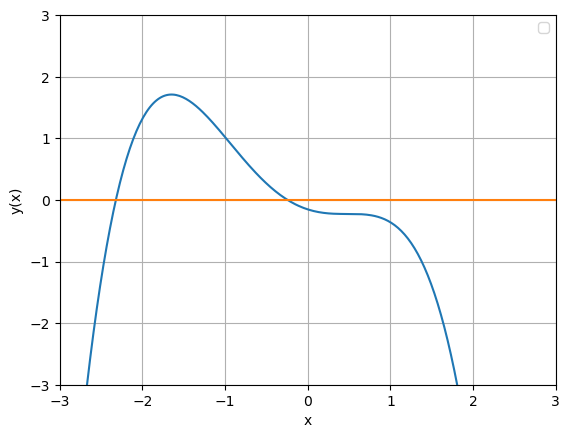

In [36]:
x = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots()

ax.plot(x, P(x))
ax.plot(x, 0*x)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax.set_xlabel('x')
ax.set_ylabel('y(x)')

plt.legend()
plt.grid()
plt.show()

График нашей функции пересекает ось $Ox$ в двух местах, что говорит о наличии как минимум двух корней. Наибольший по модулю из них находится на отрезке $[-2.5, -2]$. Докажем то, что на этом отрезке есть корень, и он является единственным.

Рассмотрим значение функции $P(x)$ на концах отрезка.

In [37]:
P(-2.5)

-1.294552946934635

In [38]:
P(-2)

1.3192249598960295

Функция меняет знак, что говорит о том, что как минимум один корень на этом отрезке существует. Исследуем функцию на монотонность, для этого найдем ее производную

$$P'(x) = 4a_4x^3+3a_3x^3+2a_2x+a_1$$

In [39]:
def P_derivative(x):
    p = 0
    n = len(a)
    
    for i in range(1, n):
        p += i * x**(i - 1) * float(a[i])
        
    return p

Рассмотрим график производной.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


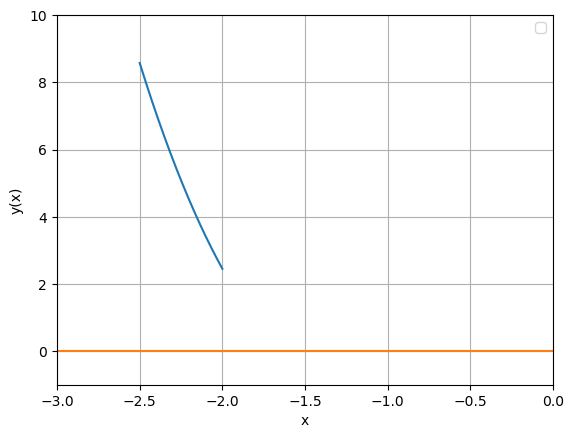

In [40]:
x = np.linspace(-2.5, -2, 1000)
y = np.linspace(-3, 3, 1000)

fig, ax = plt.subplots()

ax.plot(x, P_derivative(x))
ax.plot(y, 0*x)

ax.set_xlim(-3, 0)
ax.set_ylim(-1, 10)

ax.set_xlabel('x')
ax.set_ylabel('y(x)')

plt.legend()
plt.grid()
plt.show()

На графике видно, что производная является отрицательной, что говорит о том, что сама функция монотонна на отрезке, что свидетельствует о наличии только одного корня на исследуемом отрезке.

Для отыскания приближения с заданной точностью. Воспользуемся стандартным методом Ньютона

$$x^(k+1) = x^2 - \frac{f(x^k)}{f'(x^k)}$$

Аналогично, рассмотрим теорему о сходимости.

In [41]:
x0 = -2.3
print(f'Начальное приближение: {x0}')

h0 = -P(x0) / P_derivative(x0)
print(f'h_0: {h0}')

s0 = np.linspace(x0, x0 + 2 * h0, 1000)
print('s_0 = [', s0[0], ';', s0[-1], ']')

Начальное приближение: -2.3
h_0: -0.021766977923114692
s_0 = [ -2.3 ; -2.343533955846229 ]


In [42]:
P(s0[0]) * P_derivative(s0[0])

0.7098287060118967

In [43]:
P(s0[-1]) * P_derivative(s0[-1])

-0.8590677328935202

На концах отрезка функция не обращается в ноль.

Вычислим вторую производную для функции $P(x)$:

$$P''(x) = 12a_4x^2+6a_3x+2a_2$$

In [44]:
def P_second_derivative(x):
    p = 0
    n = len(a)
    
    for i in range(2, n):
        p += i * (i - 1) * x**(i - 2) * float(a[i])
        
    return p

In [45]:
M = np.max(np.absolute(P_second_derivative(s0)))
M

13.494942499874902

In [46]:
2 * np.absolute(h0) * M <= np.absolute(P_derivative(x0))

True

Оба условия сходимости выполняются при начальном приближении. $x_0=-2.3.$

In [47]:
def newton_method(x0, epsilon, max_iterations):
    x_prev = x0
    x_next = x_prev - P(x_prev) / P_derivative(x_prev)
    iterations = 1
    
    x_k = []
    
    while abs(x_next - x_prev) > epsilon and iterations < max_iterations:
        x_k.append([x_next, abs(x_next - x_prev)])
        
        x_prev = x_next
        x_next = x_prev - P(x_prev) / P_derivative(x_prev)
        iterations += 1

    if iterations == max_iterations:
        print("Максимальное количество итераций достигнуто!")
    
    x_k.append([x_next, abs(x_next - x_prev)])
    return x_k

x0 = -2.3  # Начальное приближение
epsilon = 1e-6  # Точность
max_iterations = 100  # Максимальное количество итераций

root = newton_method(x0, epsilon, max_iterations)
print("Корень:", root[len(root) - 1][0])

df = pd.DataFrame(root, columns=[('Метод Ньютона', 'Решение'), ('Метод Ньютона', 'Погрешность')])
df

Корень: -2.3212537947949174


,"(Метод Ньютона, Решение)","(Метод Ньютона, Погрешность)"
0,-2.32176698,0.02176698
1,-2.32125408,0.00051289
2,-2.32125379,0.00000029


In [48]:
P(root[len(root) - 1][0])

-5.524469770534779e-13

Для того, чтобы точно убедиться, что получившийся корень является наибольшим по модулю, рассмотрим и второй корень. Он находится на отрезке $[-0.5, 0]$. Проведем те же действия для его нахождения. Рассмотрим значения функции $P(x)$ на концах отрезка.

In [49]:
P(-0.5)

0.2675831407406165

In [50]:
P(0)

-0.153786586002759

Функция меняет знак, следовательно, как минимум один корень на отрезке есть. Рассмотрим, является ли он единственным. Для этого изобразим график производной.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


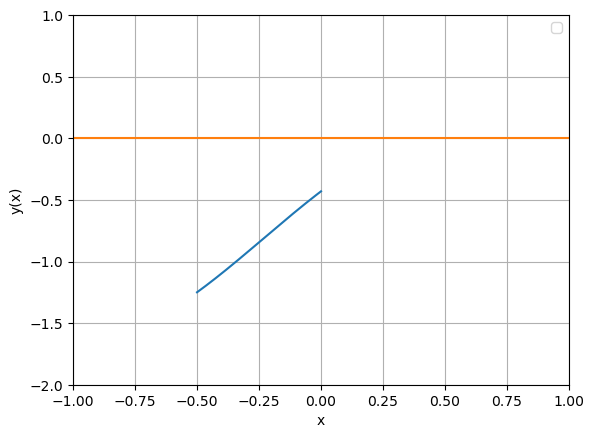

In [51]:
x = np.linspace(-0.5, 0, 1000)
y = np.linspace(-1, 1, 1000)

fig, ax = plt.subplots()

ax.plot(x, P_derivative(x))
ax.plot(y, 0*x)

ax.set_xlim(-1, 1)
ax.set_ylim(-2, 1)

ax.set_xlabel('x')
ax.set_ylabel('y(x)')

plt.legend()
plt.grid()
plt.show()

Видно, что производная функции не меняет знак, следовательно, функция монотонна, и на отрезке только один корень. Найдем его приближение методом Ньютона. Рассмотрим сначала сходимость.

In [52]:
x0 = -0.3
print(f'Начальное приближение: {x0}')

h0 = -P(x0) / P_derivative(x0)
print(f'h_0: {h0}')

s0 = np.linspace(x0, x0 + 2 * h0, 1000)
print('s_0 = [', s0[0], ';', s0[-1], ']')

Начальное приближение: -0.3
h_0: 0.052622341386282814
s_0 = [ -0.3 ; -0.19475531722743436 ]


In [53]:
P(s0[0]) * P_derivative(s0[0])

-0.04544824085396322

In [54]:
P(s0[-1]) * P_derivative(s0[-1])

0.029580709852124895

In [55]:
M = np.max(np.absolute(P_second_derivative(s0)))
M

1.711496067244416

In [56]:
2 * np.absolute(h0) * M <= np.absolute(P_derivative(x0))

True

Оба условия сходимости выполняются при начальном приближении. $x_0=-0.3.$

In [57]:
def newton_method(x0, epsilon, max_iterations):
    x_prev = x0
    x_next = x_prev - P(x_prev) / P_derivative(x_prev)
    iterations = 1
    
    x_k = []
    
    while abs(x_next - x_prev) > epsilon and iterations < max_iterations:
        x_k.append([x_next, abs(x_next - x_prev)])
        
        x_prev = x_next
        x_next = x_prev - P(x_prev) / P_derivative(x_prev)
        iterations += 1

    if iterations == max_iterations:
        print("Максимальное количество итераций достигнуто!")
    
    x_k.append([x_next, abs(x_next - x_prev)])
    return x_k

x0 = -0.3  # Начальное приближение
epsilon = 1e-6  # Точность
max_iterations = 100  # Максимальное количество итераций

root = newton_method(x0, epsilon, max_iterations)
print("Корень:", root[len(root) - 1][0])

df = pd.DataFrame(root, columns=[('Метод Ньютона', 'Решение'), ('Метод Ньютона', 'Погрешность')])
df

Корень: -0.24456355680256817


,"(Метод Ньютона, Решение)","(Метод Ньютона, Погрешность)"
0,-0.24737766,0.05262234
1,-0.24457162,0.00280604
2,-0.24456356,0.00000807
3,-0.24456356,0.00000000


In [58]:
P(root[len(root) - 1][0])

1.6696713456276768e-17

Получили значение $1.6696713456276768e-17$, что явно меньше по модулю, чем $-5.524469770534779e-13$, то есть изначательно предположение о нахождении максимального по модулю корня на отрезке $[-2.5, -2]$ было верным. И искомое приближение корня имеет вид 
$$x = -2.3212537947949174$$ И этот корень был найден за 3 итерации. 